clean and train/test data split on species_distribution_data.csv

In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
infile = 'species_distribution_data.csv'
#####
jma_df = pd.read_csv(infile, sep = (','))

#end teh cell by visualizing teh data variable, if that is what you called it, axampe:
jma_df.head()

,Transect,Biomass_g,MAD_mm,Length_mm,Angle_degree,Abundance,Latitude,Longitude,Management,Aspect,...,Profile_curvature,Proximity_index,Diversity,Sin_aspect,Slope,Slope_240,Slope_of_slope,Slope_of_slope_240,Wave_power,Site
0,PUP001,38.822840,628.600075,182.877062,13.639938,32,21.64489,-158.06639,1,1.625240,...,0.042634,0.000000,0.000000,-0.975315,6.09320,24.146000,21.80130,63.278702,14853.09961,PUP
1,PUP004,0.128699,292.160633,71.656667,10.811333,3,21.64273,-158.06592,1,0.766820,...,0.108896,0.000000,0.392213,-0.891849,4.09235,20.038700,12.58540,56.340500,14051.79980,PUP
2,PUP005,6.621155,517.647220,189.868200,17.229000,10,21.64514,-158.06548,1,0.558452,...,0.127880,0.000000,0.000000,-0.962263,3.14368,22.268801,9.83043,60.569500,14850.79980,PUP
3,PUP006,42.078543,927.395400,885.899000,17.002000,1,21.64744,-158.06490,1,1.464790,...,0.006456,0.124439,0.337360,-0.602419,3.51514,24.670900,12.88270,64.306198,15294.09961,PUP
4,PUP007,3.439379,675.913164,158.448636,16.340727,11,21.64641,-158.06582,1,0.818221,...,0.265389,0.361313,0.477289,-0.746824,4.10014,24.321699,14.21770,63.686298,15186.20020,PUP


In [ ]:
#import teh jma nitrate file, then get columns I want for the training
abundancefile = jma_df
X = abundancefile[['Bathymetry','Management','CCA_cover','Macroalgae_cover','Coral_cover','Turf_cover']]
Y = abundancefile['Abundance']
print(np.shape(X))
print(np.shape(Y))

#split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

(120, 2)
(120,)


In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

layers_saved = []
results = []
for nodes in range(7,10,1):
    for layers in range(7,10,1):   
        layers_saved.append(nodes)

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved, max_iter=500, random_state=4)
        mlp.fit(X_train, Y_train)
        trainres = mlp.score(X_train, Y_train)
        Predictions = mlp.predict(X_test)
        accresults = mlp.score(X_test, Y_test)
        res = [nodes, layers, trainres, accresults]
        results.append(res)
    layers_saved = []
    print(results)

c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[[7, 7, -0.1282446114709206, -0.26088986843629414], [7, 8, -0.07962786132983157, -0.18176173875920187], [7, 9, 0.0395261339365679, 0.004930141761424034]]


c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[[7, 7, -0.1282446114709206, -0.26088986843629414], [7, 8, -0.07962786132983157, -0.18176173875920187], [7, 9, 0.0395261339365679, 0.004930141761424034], [8, 7, -0.10137607087106981, -0.20056982827189263], [8, 8, -0.002169438634227472, -0.046849234224350944], [8, 9, 0.16391638492831717, 0.14127509435398689]]
[[7, 7, -0.1282446114709206, -0.26088986843629414], [7, 8, -0.07962786132983157, -0.18176173875920187], [7, 9, 0.0395261339365679, 0.004930141761424034], [8, 7, -0.10137607087106981, -0.20056982827189263], [8, 8, -0.002169438634227472, -0.046849234224350944], [8, 9, 0.16391638492831717, 0.14127509435398689], [9, 7, -0.013375060344693157, -0.04959271241031504], [9, 8, 0.11526861672303501, 0.15535858942577174], [9, 9, 0.1537272171065195, 0.13293797476253866]]


c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dassoc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


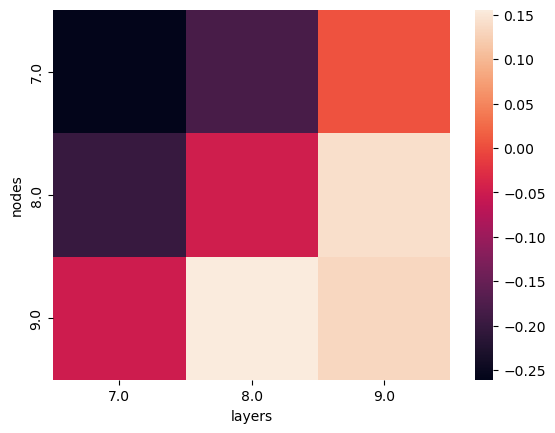

In [13]:
import seaborn as sns
myarray = np.array(results)

data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,3]})
data_pivoted = data.pivot(index='nodes', columns='layers', values='Z')
ax = sns.heatmap(data_pivoted)
plt.show()
#final model with best parameters